## WaterPump_Classification

This DrivenData competition: for identification of Tanzmanian govertment's water data

dataset link: https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
data = pd.read_csv('Training set values.csv')
data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [33]:
labels =pd.read_csv('Training set labels.csv')
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [34]:
train=data.copy()

In [35]:
train.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [36]:
train.shape

(59400, 40)

In [37]:
train=pd.merge(train,labels,on='id', how='left')

In [38]:
train.shape

(59400, 41)

In [39]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### EDA on train data

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [41]:
category_train_col = train.select_dtypes(include=['object']).columns
category_train_col

Index(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [42]:
num_train_col = train.select_dtypes(include=['float64', 'int64']).columns
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [43]:
train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [44]:
train.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
payment                      0
waterpoint_type_group        0
extraction_type_group        0
extraction_type_class        0
waterpoint_type              0
management                   0
management_group             0
source_class                 0
source_type                  0
water_quality                0
quality_group                0
extraction_type              0
quantity                     0
quantity_group               0
source                       0
payment_type                 0
id                           0
construction_year            0
basin                        0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
region  

In [45]:
train[num_train_col].isnull().sum().sort_values(ascending=False)

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [46]:
train[category_train_col].isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
water_quality                0
quality_group                0
quantity                     0
date_recorded                0
quantity_group               0
payment                      0
source                       0
source_type                  0
source_class                 0
waterpoint_type              0
waterpoint_type_group        0
payment_type                 0
extraction_type_group        0
management_group             0
management                   0
extraction_type_class        0
extraction_type              0
recorded_by                  0
ward                         0
lga                          0
region                       0
basin                        0
wpt_name                     0
status_group                 0
dtype: int64

In [47]:
#Filling the missing values with Mode of the respective column
train['funder'].fillna(train['funder'].mode()[0], inplace=True)
train['installer'].fillna(train['installer'].mode()[0], inplace=True)
train['subvillage'].fillna(train['subvillage'].mode()[0], inplace=True)
train['permit'].fillna(train['permit'].mode()[0], inplace=True)
train['public_meeting'].fillna(train['public_meeting'].mode()[0], inplace=True)
train['scheme_management'].fillna(train['scheme_management'].mode()[0], inplace=True)
train['scheme_name'].fillna(train['scheme_name'].mode()[0], inplace=True)

In [48]:
train[category_train_col].isnull().sum().sort_values(ascending=False)

date_recorded            0
extraction_type_class    0
waterpoint_type_group    0
waterpoint_type          0
source_class             0
source_type              0
source                   0
quantity_group           0
quantity                 0
quality_group            0
water_quality            0
payment_type             0
payment                  0
management_group         0
management               0
extraction_type_group    0
funder                   0
extraction_type          0
permit                   0
scheme_name              0
scheme_management        0
recorded_by              0
public_meeting           0
ward                     0
lga                      0
region                   0
subvillage               0
basin                    0
wpt_name                 0
installer                0
status_group             0
dtype: int64

In [49]:
train.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [50]:
num_train_col

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')

In [51]:
#count of pumps according to functional status

train.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [52]:
## proportions of each function of pumps
train.status_group.value_counts()/len(train)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

In [53]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [54]:
train.status_group.groupby(train.payment).groups

{'never pay': [1, 3, 4, 6, 8, 9, 10, 14, 15, 18, 22, 27, 30, 32, 34, 35, 36, 47, 51, 52, 54, 57, 58, 59, 60, 61, 64, 66, 67, 69, 71, 72, 75, 78, 80, 81, 85, 87, 91, 93, 94, 99, 100, 101, 109, 112, 116, 118, 121, 122, 124, 125, 129, 130, 132, 134, 136, 138, 139, 140, 142, 144, 146, 149, 151, 152, 154, 159, 161, 164, 166, 171, 176, 179, 181, 183, 184, 185, 187, 191, 200, 204, 205, 211, 212, 215, 217, 220, 221, 224, 226, 229, 231, 234, 239, 245, 247, 249, 252, 253, ...], 'other': [12, 73, 96, 106, 107, 123, 158, 168, 287, 334, 520, 623, 687, 728, 759, 813, 871, 911, 985, 1117, 1353, 1446, 1525, 1601, 1661, 1667, 1678, 1699, 1849, 1870, 1968, 1979, 2000, 2213, 2261, 2264, 2279, 2424, 2468, 2568, 2621, 2625, 2640, 2655, 2827, 2877, 2912, 2938, 2946, 2958, 3022, 3068, 3086, 3151, 3153, 3205, 3226, 3286, 3299, 3306, 3396, 3468, 3490, 3500, 3543, 3626, 3633, 3787, 4228, 4443, 4494, 4732, 4747, 4755, 4808, 4846, 4896, 4991, 5091, 5187, 5194, 5278, 5381, 5383, 5414, 5419, 5425, 5430, 5493, 5530,

In [55]:
train.shape

(59400, 41)

### Univariate and Bivariate Analysis

<AxesSubplot:xlabel='quantity', ylabel='count'>

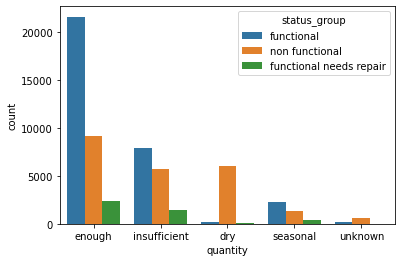

In [56]:
sns.countplot(x='quantity', data=train, hue='status_group') #dry quantity has more nonfunctional water pumps

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='status_group', ylabel='count'>

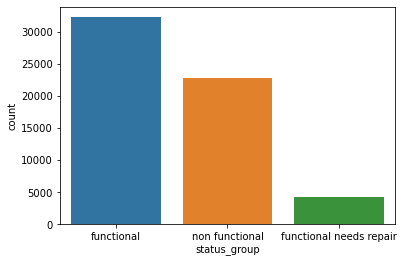

In [57]:
sns.countplot(train.status_group)

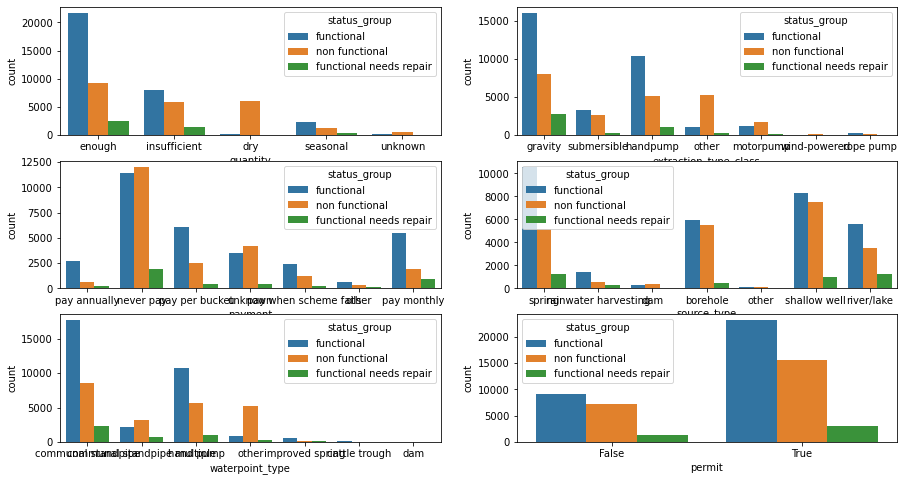

In [58]:
fig, ax = plt.subplots(figsize=(15,8))
plt.subplot(3,2,1)
sns.countplot(x='quantity', data=train, hue='status_group')
#plt.xticks(rotation=-45)
plt.subplot(3,2,2)
sns.countplot(x='extraction_type_class', data=train, hue='status_group')
#plt.xlabel('xlabel', fontsize=18)
plt.subplot(3,2,3)
sns.countplot(x='payment', data=train, hue='status_group')
plt.subplot(3,2,4)
sns.countplot(x='source_type', data=train, hue='status_group')
plt.subplot(3,2,5)
sns.countplot(x='waterpoint_type', data=train, hue='status_group')
plt.subplot(3,2,6)
sns.countplot(x='permit', data=train, hue='status_group')
plt.show()


<AxesSubplot:xlabel='quantity', ylabel='count'>

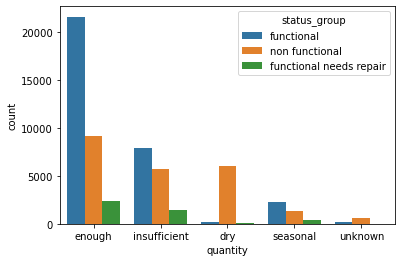

In [59]:
sns.countplot(x='quantity', data=train, hue='status_group') #dry quantity has more non functional groups

E:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\anaconda\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


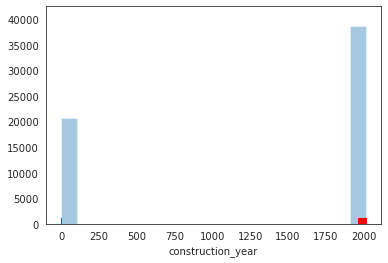

In [70]:
#continuos variable
with sns.axes_style('white'):
    
    sns.distplot(train.construction_year, hist=True, kde=False, rug=True,  rug_kws={'color': 'r'})



E:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


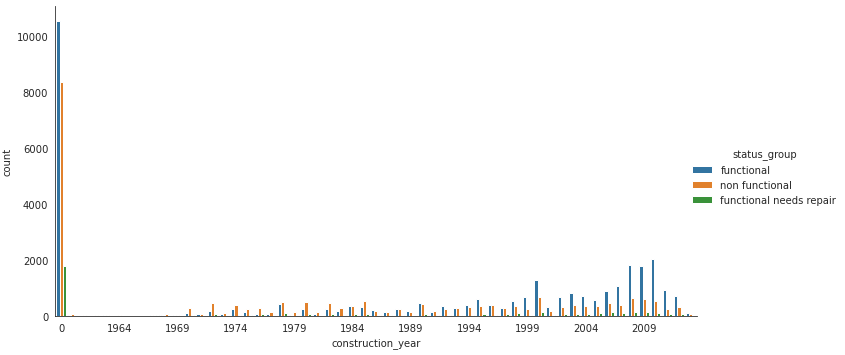

In [84]:
with sns.axes_style('white'):
    g = sns.factorplot('construction_year', data=train, aspect=2, hue='status_group', kind='count')
    
    g.set_xticklabels(step=5)

E:\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


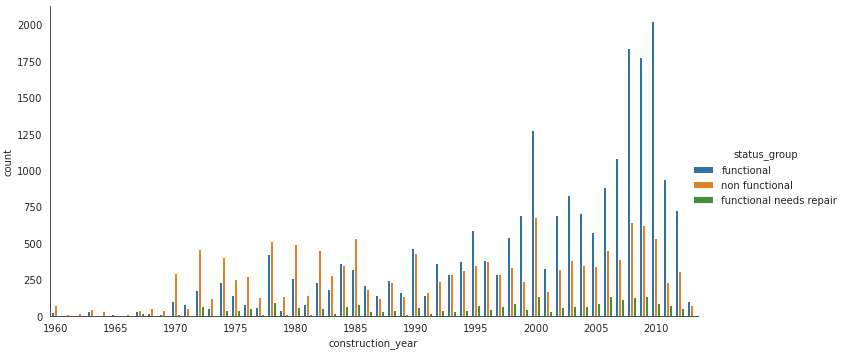

In [72]:
x =train[train['construction_year']> 0]
with sns.axes_style('white'):
    g = sns.factorplot('construction_year', data=x, aspect=2, hue='status_group', kind='count')
    
    g.set_xticklabels(step=5)

<AxesSubplot:xlabel='construction_year', ylabel='amount_tsh'>

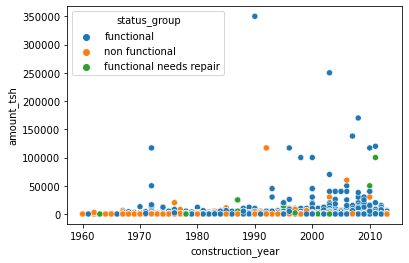

In [73]:
sns.scatterplot(x=x.construction_year, y=x.amount_tsh, hue=x.status_group) #older the pumps are non functional

<AxesSubplot:xlabel='population', ylabel='amount_tsh'>

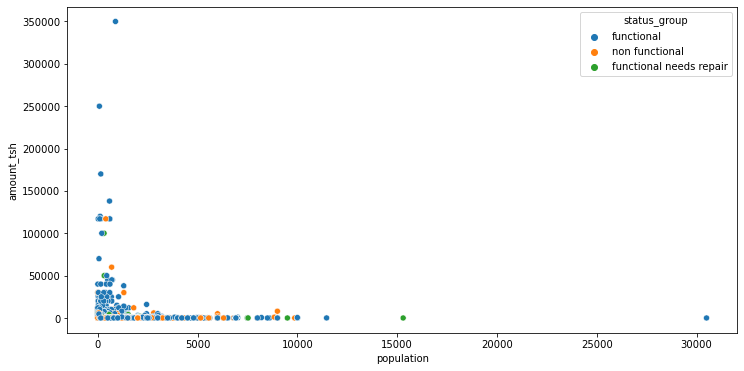

In [74]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x=x.population, y=x.amount_tsh, hue=x.status_group) #as population increases amount of water decreases
 

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

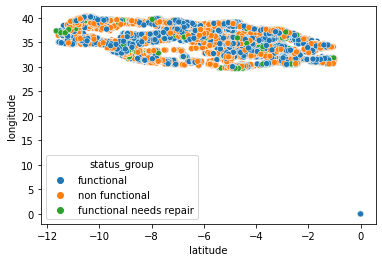

In [75]:
sns.scatterplot(y=train.longitude, x=train.latitude, hue=train.status_group)

### Finding Outlier in a numerical data column

<AxesSubplot:>

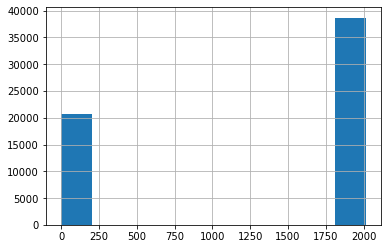

In [76]:
train['construction_year'].hist(bins=10)

<AxesSubplot:>

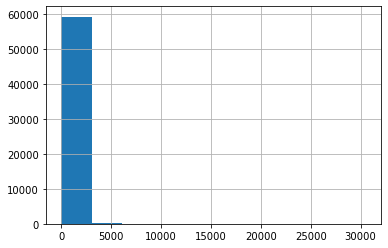

In [77]:
train['population'].hist(bins=10)

<AxesSubplot:>

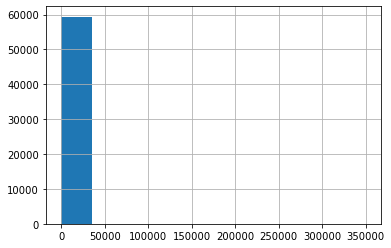

In [78]:
train['amount_tsh'].hist(bins=10)

<AxesSubplot:>

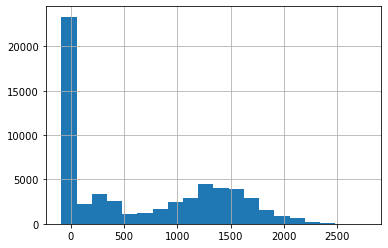

In [79]:
train['gps_height'].hist(bins=20)

### THE END